In [61]:
import pytesseract
from PIL import ImageOps
import pyautogui
import time
import re
import pandas as pd
import numpy as np
import datetime as dt
import math

# Configurar o caminho do executável do Tesseract, se necessário
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Ajuste conforme o seu caminho



In [280]:
def update_info(x,y):
    pyautogui.moveTo(x, y)
    time.sleep(0.17)
    pyautogui.mouseDown()

In [281]:
def get_info(region):
    image = pyautogui.screenshot(region=region)
    text = pytesseract.image_to_string(image)
    return text


In [772]:
id_torneio = input("Inserir o Id do Torneio")

x_init,x_end = 15,653
y_constant = 400
time_pattern = re.compile(r'\b\d{1,2}:\d{2}:\d{2}\b')


interval_lenght = x_end - x_init

time_u, time_v = np.array([5,192]), np.array([99,209])
time_region = (*time_u,*(time_v-time_u))

remaning_u, remaning_v = np.array([160,191]), np.array([394,212])
remaning_region = (*remaning_u,*(remaning_v-remaning_u))

entries_u, entries_v = np.array([760,121]), np.array([823,149])
entries_region = (*entries_u,*(entries_v-entries_u))
number_of_entries_str = re.findall(r'\b\d+\b', get_info(entries_region))
number_of_entries = int(number_of_entries_str[0])

update_info(x_init,y_constant)
text_time_init = get_info(time_region)
update_info(x_end,y_constant)
text_time_end = get_info(time_region)
start_time, end_time = time_pattern.findall(text_time_init)[0],time_pattern.findall(text_time_end)[0]
time_obj_init, time_obj_end = dt.datetime.strptime(start_time, "%H:%M:%S"), dt.datetime.strptime(end_time, "%H:%M:%S")

delta_x = interval_lenght/((time_obj_end - time_obj_init).seconds/60)
number_of_interaction = math.ceil(interval_lenght/delta_x)


tm_minute_data = []
for i in range(number_of_interaction + 1):
    update_info(x_init,y_constant)
    text_time_interactions = get_info(time_region)
    actually_time = time_pattern.findall(text_time_interactions)[0]
    remaining_number_str = re.findall(r'\b\d+\b', get_info(remaning_region))
    remaining_number = int(remaining_number_str[0])
    minute_data = {
        "index":i,
        "id_torneio":id_torneio,
        "time":actually_time,
        "remaining_players":remaining_number,
        "number_of_entries":number_of_entries

    }
    tm_minute_data.append(minute_data)
    x_init += delta_x

tm_df = pd.DataFrame(tm_minute_data)
tm_df = tm_df.set_index("index")
tm_df.to_csv(f'./data_1_dol_45/{id_torneio}.csv',sep=';')


IndexError: list index out of range

In [773]:
import os
import matplotlib.pyplot as plt

In [774]:
my_tournments = os.listdir(path="data_1_dol_45")

In [775]:
dflsft = []
for f in my_tournments:
    df = pd.read_csv(os.path.join("data_1_dol_45",f),sep=';')
    dflsft.append(df)

In [776]:
X = pd.concat(dflsft)

In [777]:
X_ = pd.pivot_table(X,index='index',columns="id_torneio",values="remaining_players",aggfunc='first')

Text(0, 0.5, 'Número de Jogadores')

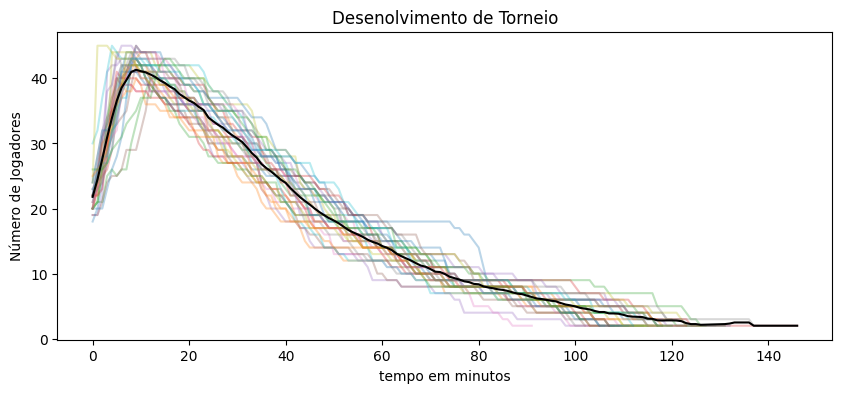

In [778]:
X_.plot(legend=False,alpha=0.3,figsize = (10,4))
X_.mean(axis=1).plot(color='black')
plt.title("Desenolvimento de Torneio")
plt.xlabel("tempo em minutos")
plt.ylabel("Número de Jogadores")


In [779]:
corte_minuto = X.set_index(["id_torneio",'time']).sort_index()

<Axes: ylabel='Frequency'>

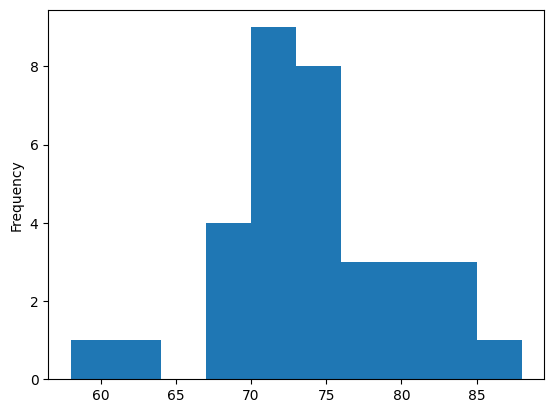

In [780]:
corte_minuto[corte_minuto['remaining_players'] <= 9].groupby(level=0)['index'].min().plot(kind='hist')

<Axes: ylabel='Density'>

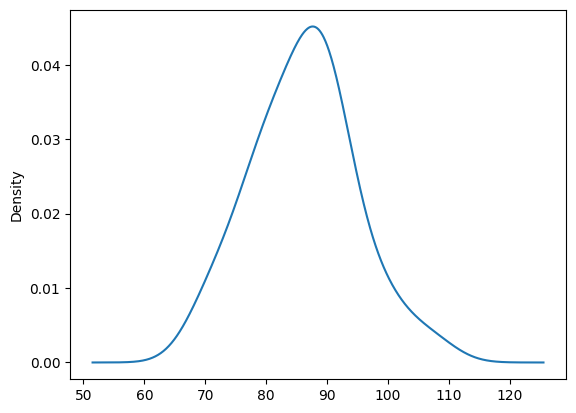

In [797]:
corte_minuto[corte_minuto['remaining_players'] <= 7].groupby(level=0)['index'].min().plot(kind='kde')